In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# 정규화 함수 
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(data,value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back 
df=pd.read_csv("C://Users//yoona//Desktop//gem.csv")
# df = df[::-1]      # 행을 역순으로 저장해야됨 ---> 그래도 인덱스는 안바뀐다
df

,Date,Close,Open,High,Low,Volume,변동 %
0,2016-01-04,22850,22650,23800,22350,273.73K,1.33%
1,2016-01-05,22300,22400,22900,22150,181.66K,-2.41%
2,2016-01-06,23000,22500,23350,22350,220.77K,3.14%
3,2016-01-07,22750,22800,23300,22400,180.11K,-1.09%
4,2016-01-08,22850,22300,23150,21750,169.57K,0.44%
...,...,...,...,...,...,...,...
1376,2021-01-21,24950,25450,26150,24800,0.02K,-1.77%
1377,2021-01-22,25150,24600,25200,24200,363.51K,0.80%
1378,2021-01-24,25150,25150,25150,25150,-,0.00%
1379,2021-01-25,25000,25350,25550,24650,0.13K,-0.60%


In [2]:
del df['변동 %']
xy = df[['Open','High','Low','Close']]  # Date는 당장은 필요 없으니까 빼주고, Volume이랑 Close 위치 바꿈
xy

,Open,High,Low,Close
0,22650,23800,22350,22850
1,22400,22900,22150,22300
2,22500,23350,22350,23000
3,22800,23300,22400,22750
4,22300,23150,21750,22850
...,...,...,...,...
1376,25450,26150,24800,24950
1377,24600,25200,24200,25150
1378,25150,25150,25150,25150
1379,25350,25550,24650,25000


In [3]:
xy = xy.values
xy

array([[22650, 23800, 22350, 22850],
       [22400, 22900, 22150, 22300],
       [22500, 23350, 22350, 23000],
       ...,
       [25150, 25150, 25150, 25150],
       [25350, 25550, 24650, 25000],
       [24900, 25450, 24450, 25050]], dtype=int64)

(1381, 4)


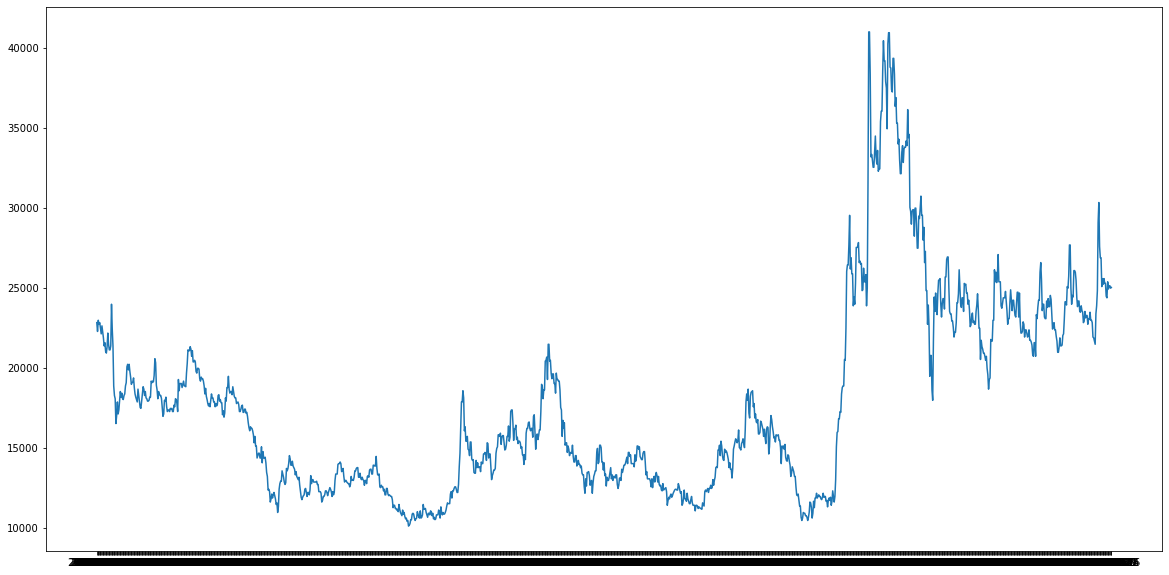

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(df.loc[:,'Date'],xy[:,3]) # 전체 종가 Close
print(xy.shape)

In [5]:
window = 7 # window size 
dataDim = 5 # 시가, 고가, 저가, 거래량 , 종가
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.8)   # 80%만 train

trainSet = xy[0:trainSize]
testSet = xy[trainSize-window:]  # trainsize - windowsize 부터 끝까지 test

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)

def buildDataSet(data, window):
    xdata = []
    ydata = []
    for i in range(0, len(data)-window):
        xdata.append(data[i:i+window,:-1])  # 행은 7개씩, 열은 마지막 종가 빼고 다
        ydata.append(data[i+window,[-1]])   # 행은 그 다음 행 하나랑, 열은 종가만
    return np.array(xdata), np.array(ydata)
    
trainX, trainY=buildDataSet(trainSet, window)
testX, testY=buildDataSet(testSet, window)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, activation='tanh', input_shape=[7,3]))   # 처음 세트 7개랑 열은 3개
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                140       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
69/69 [==============================] - 1s 938us/step - loss: 0.0042 - mae: 0.0403
Epoch 2/1000
69/69 [==============================] - 0s 855us/step - loss: 0.0015 - mae: 0.0257
Epoch 3/1000
69/69 [==============================] - 0s 861us/step - loss: 0.0013 - mae: 0.0232
Epoch 4/1000
69/69 [==============================] - 0s 865us/step - loss: 0.0013 - mae: 0.0238
Epoch 5/1000
69/69 [==============================] - 0s 836us/step - loss: 9.7321e-04 - mae: 0.0203
Epoch 6/1000
69/69 [==============================] - 0s 863us/step - loss: 8.5338e-04 - mae: 0.0193
Epoch 7/1000
69/69 [==============================] - 0s 836us/step - loss: 7.8803e-04 - mae: 0.0185
Epoch 8/1000
69/69 [==============================] - 0s 851us/step - loss: 0.0011 - mae: 0.0204
Epoch 9/1000
69/69 [==============================] - 0s 845us/step - loss: 6.6307e-04 - mae: 0.0174
Epoch 10/1000
69/69 [==============================] - 0s 840us/step - loss: 8.5821e-04 - mae: 0.0184
Epoch 11/

69/69 [==============================] - 0s 836us/step - loss: 5.6717e-04 - mae: 0.0157
Epoch 82/1000
69/69 [==============================] - 0s 821us/step - loss: 5.4531e-04 - mae: 0.0145
Epoch 83/1000
69/69 [==============================] - 0s 836us/step - loss: 6.4168e-04 - mae: 0.0154
Epoch 84/1000
69/69 [==============================] - 0s 821us/step - loss: 8.5811e-04 - mae: 0.0174
Epoch 85/1000
69/69 [==============================] - 0s 821us/step - loss: 8.3492e-04 - mae: 0.0166
Epoch 86/1000
69/69 [==============================] - 0s 829us/step - loss: 6.5548e-04 - mae: 0.0148
Epoch 87/1000
69/69 [==============================] - 0s 851us/step - loss: 5.4265e-04 - mae: 0.0145
Epoch 88/1000
69/69 [==============================] - 0s 824us/step - loss: 5.3033e-04 - mae: 0.0146
Epoch 89/1000
69/69 [==============================] - 0s 836us/step - loss: 6.4688e-04 - mae: 0.0160
Epoch 90/1000
69/69 [==============================] - 0s 821us/step - loss: 5.1731e-04 - mae: 0

69/69 [==============================] - 0s 851us/step - loss: 6.2495e-04 - mae: 0.0152
Epoch 161/1000
69/69 [==============================] - 0s 873us/step - loss: 6.6442e-04 - mae: 0.0162
Epoch 162/1000
69/69 [==============================] - 0s 851us/step - loss: 7.9061e-04 - mae: 0.0172
Epoch 163/1000
69/69 [==============================] - 0s 840us/step - loss: 6.3828e-04 - mae: 0.0146
Epoch 164/1000
69/69 [==============================] - 0s 880us/step - loss: 6.2932e-04 - mae: 0.0157
Epoch 165/1000
69/69 [==============================] - 0s 851us/step - loss: 5.9381e-04 - mae: 0.0152
Epoch 166/1000
69/69 [==============================] - 0s 851us/step - loss: 6.7506e-04 - mae: 0.0155
Epoch 167/1000
69/69 [==============================] - 0s 865us/step - loss: 6.5618e-04 - mae: 0.0152
Epoch 168/1000
69/69 [==============================] - 0s 924us/step - loss: 4.8623e-04 - mae: 0.0144
Epoch 169/1000
69/69 [==============================] - 0s 865us/step - loss: 4.2814e-04

69/69 [==============================] - 0s 894us/step - loss: 5.5325e-04 - mae: 0.0153
Epoch 240/1000
69/69 [==============================] - 0s 895us/step - loss: 5.9393e-04 - mae: 0.0152
Epoch 241/1000
69/69 [==============================] - 0s 870us/step - loss: 4.4012e-04 - mae: 0.0140
Epoch 242/1000
69/69 [==============================] - 0s 851us/step - loss: 5.1247e-04 - mae: 0.0146
Epoch 243/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.3138e-04 - mae: 0.0150
Epoch 244/1000
69/69 [==============================] - 0s 874us/step - loss: 5.5805e-04 - mae: 0.0147
Epoch 245/1000
69/69 [==============================] - 0s 851us/step - loss: 5.2513e-04 - mae: 0.0150
Epoch 246/1000
69/69 [==============================] - 0s 851us/step - loss: 5.6355e-04 - mae: 0.0157
Epoch 247/1000
69/69 [==============================] - 0s 851us/step - loss: 6.0625e-04 - mae: 0.0156
Epoch 248/1000
69/69 [==============================] - 0s 821us/step - loss: 5.5299e-04 -

69/69 [==============================] - 0s 844us/step - loss: 8.6911e-04 - mae: 0.0173
Epoch 319/1000
69/69 [==============================] - 0s 821us/step - loss: 8.0316e-04 - mae: 0.0156
Epoch 320/1000
69/69 [==============================] - 0s 821us/step - loss: 7.1407e-04 - mae: 0.0155
Epoch 321/1000
69/69 [==============================] - 0s 851us/step - loss: 6.8915e-04 - mae: 0.0149
Epoch 322/1000
69/69 [==============================] - 0s 922us/step - loss: 5.1556e-04 - mae: 0.0149
Epoch 323/1000
69/69 [==============================] - 0s 851us/step - loss: 6.3237e-04 - mae: 0.0154
Epoch 324/1000
69/69 [==============================] - 0s 836us/step - loss: 5.4849e-04 - mae: 0.0143
Epoch 325/1000
69/69 [==============================] - 0s 851us/step - loss: 4.5890e-04 - mae: 0.0142
Epoch 326/1000
69/69 [==============================] - 0s 851us/step - loss: 4.9101e-04 - mae: 0.0149
Epoch 327/1000
69/69 [==============================] - 0s 852us/step - loss: 5.5592e-04

69/69 [==============================] - 0s 826us/step - loss: 5.5769e-04 - mae: 0.0153
Epoch 398/1000
69/69 [==============================] - 0s 821us/step - loss: 4.8909e-04 - mae: 0.0145
Epoch 399/1000
69/69 [==============================] - 0s 836us/step - loss: 5.6251e-04 - mae: 0.0152
Epoch 400/1000
69/69 [==============================] - 0s 807us/step - loss: 5.7619e-04 - mae: 0.0156
Epoch 401/1000
69/69 [==============================] - 0s 836us/step - loss: 7.5035e-04 - mae: 0.0154
Epoch 402/1000
69/69 [==============================] - 0s 838us/step - loss: 5.5671e-04 - mae: 0.0155
Epoch 403/1000
69/69 [==============================] - 0s 821us/step - loss: 5.9918e-04 - mae: 0.0154
Epoch 404/1000
69/69 [==============================] - 0s 821us/step - loss: 6.6452e-04 - mae: 0.0155
Epoch 405/1000
69/69 [==============================] - 0s 826us/step - loss: 5.6092e-04 - mae: 0.0151
Epoch 406/1000
69/69 [==============================] - 0s 836us/step - loss: 7.2860e-04

69/69 [==============================] - 0s 823us/step - loss: 5.5741e-04 - mae: 0.0145
Epoch 477/1000
69/69 [==============================] - 0s 836us/step - loss: 5.2345e-04 - mae: 0.0141
Epoch 478/1000
69/69 [==============================] - 0s 836us/step - loss: 5.9253e-04 - mae: 0.0153
Epoch 479/1000
69/69 [==============================] - 0s 836us/step - loss: 5.6783e-04 - mae: 0.0146
Epoch 480/1000
69/69 [==============================] - 0s 836us/step - loss: 4.6359e-04 - mae: 0.0143
Epoch 481/1000
69/69 [==============================] - 0s 851us/step - loss: 8.5738e-04 - mae: 0.0163
Epoch 482/1000
69/69 [==============================] - 0s 821us/step - loss: 6.2527e-04 - mae: 0.0153
Epoch 483/1000
69/69 [==============================] - 0s 836us/step - loss: 6.6796e-04 - mae: 0.0160
Epoch 484/1000
69/69 [==============================] - 0s 821us/step - loss: 6.2224e-04 - mae: 0.0152
Epoch 485/1000
69/69 [==============================] - 0s 826us/step - loss: 5.9460e-04

69/69 [==============================] - 0s 829us/step - loss: 5.4994e-04 - mae: 0.0152
Epoch 555/1000
69/69 [==============================] - 0s 821us/step - loss: 4.9960e-04 - mae: 0.0140
Epoch 556/1000
69/69 [==============================] - 0s 820us/step - loss: 6.4127e-04 - mae: 0.0156
Epoch 557/1000
69/69 [==============================] - 0s 821us/step - loss: 5.8428e-04 - mae: 0.0150
Epoch 558/1000
69/69 [==============================] - 0s 821us/step - loss: 5.5796e-04 - mae: 0.0147
Epoch 559/1000
69/69 [==============================] - 0s 835us/step - loss: 6.7285e-04 - mae: 0.0152
Epoch 560/1000
69/69 [==============================] - 0s 836us/step - loss: 6.3078e-04 - mae: 0.0155
Epoch 561/1000
69/69 [==============================] - 0s 807us/step - loss: 5.9889e-04 - mae: 0.0150
Epoch 562/1000
69/69 [==============================] - 0s 821us/step - loss: 5.3697e-04 - mae: 0.0145
Epoch 563/1000
69/69 [==============================] - 0s 821us/step - loss: 5.3848e-04

69/69 [==============================] - 0s 833us/step - loss: 4.3397e-04 - mae: 0.0140
Epoch 634/1000
69/69 [==============================] - 0s 821us/step - loss: 6.0220e-04 - mae: 0.0149
Epoch 635/1000
69/69 [==============================] - 0s 821us/step - loss: 6.2639e-04 - mae: 0.0156
Epoch 636/1000
69/69 [==============================] - 0s 821us/step - loss: 5.1690e-04 - mae: 0.0141
Epoch 637/1000
69/69 [==============================] - 0s 821us/step - loss: 5.4253e-04 - mae: 0.0143
Epoch 638/1000
69/69 [==============================] - 0s 821us/step - loss: 7.7496e-04 - mae: 0.0154
Epoch 639/1000
69/69 [==============================] - 0s 864us/step - loss: 5.9611e-04 - mae: 0.0142
Epoch 640/1000
69/69 [==============================] - 0s 821us/step - loss: 5.5937e-04 - mae: 0.0148
Epoch 641/1000
69/69 [==============================] - 0s 836us/step - loss: 6.4851e-04 - mae: 0.0145
Epoch 642/1000
69/69 [==============================] - 0s 825us/step - loss: 4.4965e-04

69/69 [==============================] - 0s 851us/step - loss: 5.8878e-04 - mae: 0.0152
Epoch 713/1000
69/69 [==============================] - 0s 836us/step - loss: 4.5547e-04 - mae: 0.0139
Epoch 714/1000
69/69 [==============================] - 0s 851us/step - loss: 7.2673e-04 - mae: 0.0160
Epoch 715/1000
69/69 [==============================] - 0s 836us/step - loss: 4.8262e-04 - mae: 0.0143
Epoch 716/1000
69/69 [==============================] - 0s 836us/step - loss: 5.0240e-04 - mae: 0.0146
Epoch 717/1000
69/69 [==============================] - 0s 821us/step - loss: 4.4683e-04 - mae: 0.0138
Epoch 718/1000
69/69 [==============================] - 0s 851us/step - loss: 5.8598e-04 - mae: 0.0156
Epoch 719/1000
69/69 [==============================] - 0s 851us/step - loss: 3.8768e-04 - mae: 0.0130
Epoch 720/1000
69/69 [==============================] - 0s 851us/step - loss: 6.4111e-04 - mae: 0.0152
Epoch 721/1000
69/69 [==============================] - 0s 821us/step - loss: 5.0616e-04

Epoch 791/1000
69/69 [==============================] - 0s 831us/step - loss: 6.7188e-04 - mae: 0.0147
Epoch 792/1000
69/69 [==============================] - 0s 843us/step - loss: 5.3889e-04 - mae: 0.0150
Epoch 793/1000
69/69 [==============================] - 0s 821us/step - loss: 4.7268e-04 - mae: 0.0141
Epoch 794/1000
69/69 [==============================] - 0s 836us/step - loss: 4.4139e-04 - mae: 0.0138
Epoch 795/1000
69/69 [==============================] - 0s 821us/step - loss: 7.5451e-04 - mae: 0.0157
Epoch 796/1000
69/69 [==============================] - 0s 834us/step - loss: 6.2816e-04 - mae: 0.0156
Epoch 797/1000
69/69 [==============================] - 0s 880us/step - loss: 5.6737e-04 - mae: 0.0150
Epoch 798/1000
69/69 [==============================] - 0s 851us/step - loss: 5.7106e-04 - mae: 0.0151
Epoch 799/1000
69/69 [==============================] - 0s 841us/step - loss: 4.4508e-04 - mae: 0.0138
Epoch 800/1000
69/69 [==============================] - 0s 821us/step - l

69/69 [==============================] - 0s 924us/step - loss: 5.0463e-04 - mae: 0.0148
Epoch 871/1000
69/69 [==============================] - 0s 939us/step - loss: 5.9291e-04 - mae: 0.0156
Epoch 872/1000
69/69 [==============================] - 0s 924us/step - loss: 5.8202e-04 - mae: 0.0153
Epoch 873/1000
69/69 [==============================] - 0s 895us/step - loss: 5.0505e-04 - mae: 0.0140
Epoch 874/1000
69/69 [==============================] - 0s 865us/step - loss: 5.8551e-04 - mae: 0.0150
Epoch 875/1000
69/69 [==============================] - 0s 865us/step - loss: 5.1597e-04 - mae: 0.0151
Epoch 876/1000
69/69 [==============================] - 0s 880us/step - loss: 4.8802e-04 - mae: 0.0145
Epoch 877/1000
69/69 [==============================] - 0s 880us/step - loss: 4.6994e-04 - mae: 0.0145
Epoch 878/1000
69/69 [==============================] - 0s 880us/step - loss: 5.1422e-04 - mae: 0.0146
Epoch 879/1000
69/69 [==============================] - 0s 895us/step - loss: 5.2465e-04

69/69 [==============================] - 0s 828us/step - loss: 5.3435e-04 - mae: 0.0143
Epoch 950/1000
69/69 [==============================] - 0s 851us/step - loss: 5.0381e-04 - mae: 0.0141
Epoch 951/1000
69/69 [==============================] - 0s 829us/step - loss: 5.0549e-04 - mae: 0.0151
Epoch 952/1000
69/69 [==============================] - 0s 851us/step - loss: 5.6467e-04 - mae: 0.0147
Epoch 953/1000
69/69 [==============================] - 0s 865us/step - loss: 4.9577e-04 - mae: 0.0144
Epoch 954/1000
69/69 [==============================] - 0s 821us/step - loss: 5.6911e-04 - mae: 0.0151
Epoch 955/1000
69/69 [==============================] - 0s 821us/step - loss: 5.7553e-04 - mae: 0.0147
Epoch 956/1000
69/69 [==============================] - 0s 821us/step - loss: 7.2907e-04 - mae: 0.0161
Epoch 957/1000
69/69 [==============================] - 0s 821us/step - loss: 6.2895e-04 - mae: 0.0154
Epoch 958/1000
69/69 [==============================] - 0s 846us/step - loss: 7.4013e-04

In [8]:
# 모델 테스트 
res = model.evaluate(testX, testY, batch_size=16)
print("테스트 loss :",res[0],", 테스트 mae :",res[1])

18/18 [==============================] - 0s 645us/step - loss: 0.0061 - mae: 0.0543
테스트 loss : 0.006103879306465387 , 테스트 mae : 0.0542592816054821


In [9]:
# 모델 사용
prediction = model.predict(testX)

print("MSE Evaluate : {}".format(np.average((prediction - testY)**2))) # mse인데 위에 loss랑 거의 같음

# 원래 값으로 되돌리기 
predict1 = back_MinMax(xy[trainSize-window:,[-1]],prediction)
actual = back_MinMax(xy[trainSize-window:,[-1]],testY)

# print(predict1.shape) == print(actual.shape) == (147, 1)

MSE Evaluate : 0.006103877968566969


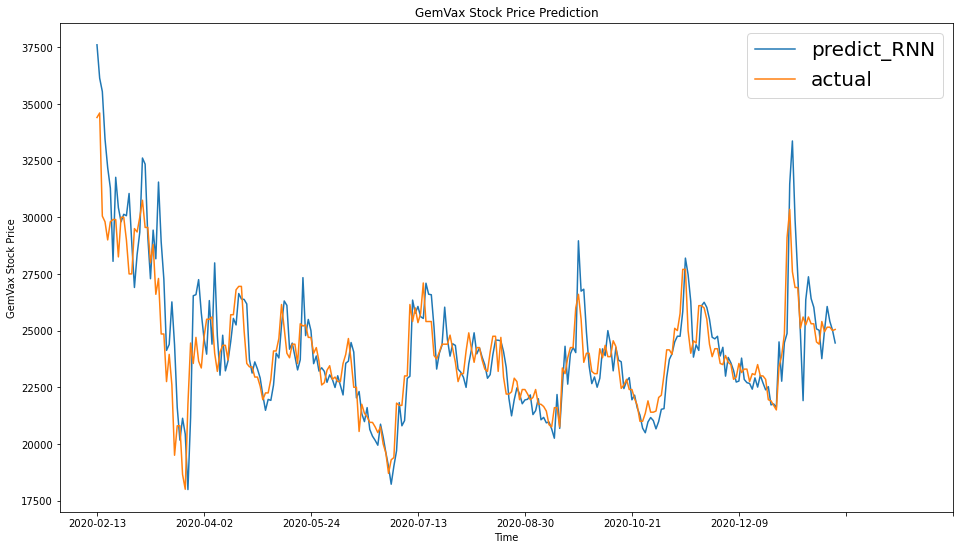

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict1, label = "predict_RNN")
plt.plot(actual,label = "actual")
plt.xticks(np.arange(0,325,40))
plt.title('GemVax Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GemVax Stock Price')
plt.legend(prop={'size': 20})

In [11]:
model2 = keras.Sequential()

model2.add(layers.LSTM(units=10, activation='tanh', input_shape=[7,3]))

model2.add(layers.Dense(1))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

model2.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
69/69 [==============================] - 2s 2ms/step - loss: 0.0729 - mae: 0.1794
Epoch 2/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0603
Epoch 3/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0029 - mae: 0.0294
Epoch 4/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0271
Epoch 5/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0259
Epoch 6/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0269
Epoch 7/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0258
Epoch 8/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0237
Epoch 9/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.0016 - mae: 0.0251
Epoch 10/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0016 - mae: 0.0244
Epoch 11/1000
69/69 [============================

69/69 [==============================] - 0s 2ms/step - loss: 6.8967e-04 - mae: 0.0164
Epoch 85/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.6673e-04 - mae: 0.0156
Epoch 86/1000
69/69 [==============================] - 0s 2ms/step - loss: 6.8026e-04 - mae: 0.0163
Epoch 87/1000
69/69 [==============================] - 0s 2ms/step - loss: 6.8432e-04 - mae: 0.0163
Epoch 88/1000
69/69 [==============================] - 0s 2ms/step - loss: 6.3893e-04 - mae: 0.0164
Epoch 89/1000
69/69 [==============================] - 0s 2ms/step - loss: 7.1734e-04 - mae: 0.0173
Epoch 90/1000
69/69 [==============================] - 0s 2ms/step - loss: 9.3406e-04 - mae: 0.0170
Epoch 91/1000
69/69 [==============================] - 0s 2ms/step - loss: 7.6287e-04 - mae: 0.0159
Epoch 92/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.7319e-04 - mae: 0.0150
Epoch 93/1000
69/69 [==============================] - 0s 2ms/step - loss: 9.5545e-04 - mae: 0.0161
Epoch 94/1000


69/69 [==============================] - 0s 2ms/step - loss: 5.5220e-04 - mae: 0.0146
Epoch 166/1000
69/69 [==============================] - 0s 1ms/step - loss: 6.0775e-04 - mae: 0.0151
Epoch 167/1000
69/69 [==============================] - 0s 1ms/step - loss: 7.9265e-04 - mae: 0.0157
Epoch 168/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.0865e-04 - mae: 0.0144
Epoch 169/1000
69/69 [==============================] - 0s 1ms/step - loss: 6.1803e-04 - mae: 0.0157
Epoch 170/1000
69/69 [==============================] - 0s 1ms/step - loss: 6.7685e-04 - mae: 0.0158
Epoch 171/1000
69/69 [==============================] - 0s 1ms/step - loss: 7.7345e-04 - mae: 0.0159
Epoch 172/1000
69/69 [==============================] - 0s 1ms/step - loss: 7.2903e-04 - mae: 0.0157
Epoch 173/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.7964e-04 - mae: 0.0153
Epoch 174/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0189
Epoch 175

69/69 [==============================] - 0s 1ms/step - loss: 6.8683e-04 - mae: 0.0159
Epoch 247/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.9617e-04 - mae: 0.0143
Epoch 248/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.3458e-04 - mae: 0.0150
Epoch 249/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.6082e-04 - mae: 0.0147
Epoch 250/1000
69/69 [==============================] - 0s 2ms/step - loss: 6.2841e-04 - mae: 0.0157
Epoch 251/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.5841e-04 - mae: 0.0145
Epoch 252/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.5243e-04 - mae: 0.0145
Epoch 253/1000
69/69 [==============================] - 0s 1ms/step - loss: 6.6419e-04 - mae: 0.0166
Epoch 254/1000
69/69 [==============================] - 0s 1ms/step - loss: 9.4043e-04 - mae: 0.0165
Epoch 255/1000
69/69 [==============================] - 0s 2ms/step - loss: 8.0239e-04 - mae: 0.0159
Epoch

69/69 [==============================] - 0s 1ms/step - loss: 6.9730e-04 - mae: 0.0152
Epoch 328/1000
69/69 [==============================] - 0s 1ms/step - loss: 8.6564e-04 - mae: 0.0157
Epoch 329/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.3942e-04 - mae: 0.0152
Epoch 330/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.6555e-04 - mae: 0.0163
Epoch 331/1000
69/69 [==============================] - 0s 1ms/step - loss: 7.0535e-04 - mae: 0.0161
Epoch 332/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.7092e-04 - mae: 0.0156
Epoch 333/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.5936e-04 - mae: 0.0151
Epoch 334/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.6217e-04 - mae: 0.0152
Epoch 335/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.9396e-04 - mae: 0.0150
Epoch 336/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.3712e-04 - mae: 0.0147
Epoch

69/69 [==============================] - 0s 1ms/step - loss: 5.8808e-04 - mae: 0.0150
Epoch 409/1000
69/69 [==============================] - 0s 2ms/step - loss: 6.1984e-04 - mae: 0.0150
Epoch 410/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.6481e-04 - mae: 0.0139
Epoch 411/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.6150e-04 - mae: 0.0155
Epoch 412/1000
69/69 [==============================] - 0s 2ms/step - loss: 8.2777e-04 - mae: 0.0156
Epoch 413/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.8626e-04 - mae: 0.0147
Epoch 414/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.7491e-04 - mae: 0.0150
Epoch 415/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.2252e-04 - mae: 0.0148
Epoch 416/1000
69/69 [==============================] - 0s 2ms/step - loss: 7.0320e-04 - mae: 0.0155
Epoch 417/1000
69/69 [==============================] - 0s 2ms/step - loss: 6.0117e-04 - mae: 0.0149
Epoch

69/69 [==============================] - 0s 2ms/step - loss: 4.6217e-04 - mae: 0.0141
Epoch 490/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.0227e-04 - mae: 0.0130
Epoch 491/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.2736e-04 - mae: 0.0145
Epoch 492/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.4258e-04 - mae: 0.0147
Epoch 493/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.7493e-04 - mae: 0.0140
Epoch 494/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.3190e-04 - mae: 0.0133
Epoch 495/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.4310e-04 - mae: 0.0136
Epoch 496/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.7255e-04 - mae: 0.0145
Epoch 497/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.4171e-04 - mae: 0.0154
Epoch 498/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.4357e-04 - mae: 0.0136
Epoch

69/69 [==============================] - 0s 1ms/step - loss: 5.6681e-04 - mae: 0.0157
Epoch 571/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.9725e-04 - mae: 0.0139
Epoch 572/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.7247e-04 - mae: 0.0142
Epoch 573/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.1426e-04 - mae: 0.0138
Epoch 574/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.5133e-04 - mae: 0.0138
Epoch 575/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.1969e-04 - mae: 0.0143
Epoch 576/1000
69/69 [==============================] - 0s 2ms/step - loss: 5.9199e-04 - mae: 0.0151
Epoch 577/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.6729e-04 - mae: 0.0138
Epoch 578/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.3912e-04 - mae: 0.0139
Epoch 579/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.9248e-04 - mae: 0.0143
Epoch

69/69 [==============================] - 0s 2ms/step - loss: 3.9785e-04 - mae: 0.0130
Epoch 652/1000
69/69 [==============================] - 0s 1ms/step - loss: 3.4463e-04 - mae: 0.0122
Epoch 653/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.7136e-04 - mae: 0.0148
Epoch 654/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.6870e-04 - mae: 0.0145
Epoch 655/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.5489e-04 - mae: 0.0139
Epoch 656/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.3477e-04 - mae: 0.0135
Epoch 657/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.8150e-04 - mae: 0.0140
Epoch 658/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.1753e-04 - mae: 0.0149
Epoch 659/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.4935e-04 - mae: 0.0138
Epoch 660/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.2232e-04 - mae: 0.0139
Epoch

69/69 [==============================] - 0s 2ms/step - loss: 4.0347e-04 - mae: 0.0137
Epoch 733/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.8613e-04 - mae: 0.0132
Epoch 734/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.3647e-04 - mae: 0.0144
Epoch 735/1000
69/69 [==============================] - 0s 1ms/step - loss: 3.9972e-04 - mae: 0.0131
Epoch 736/1000
69/69 [==============================] - 0s 1ms/step - loss: 3.9710e-04 - mae: 0.0136
Epoch 737/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.9483e-04 - mae: 0.0126
Epoch 738/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.4375e-04 - mae: 0.0137
Epoch 739/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.3567e-04 - mae: 0.0135
Epoch 740/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.9830e-04 - mae: 0.0128
Epoch 741/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.2718e-04 - mae: 0.0131
Epoch

69/69 [==============================] - 0s 2ms/step - loss: 4.0975e-04 - mae: 0.0134
Epoch 814/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.8457e-04 - mae: 0.0130
Epoch 815/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.0667e-04 - mae: 0.0133
Epoch 816/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.7837e-04 - mae: 0.0144
Epoch 817/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.5305e-04 - mae: 0.0138
Epoch 818/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.5538e-04 - mae: 0.0143
Epoch 819/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.8763e-04 - mae: 0.0133
Epoch 820/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.7230e-04 - mae: 0.0130
Epoch 821/1000
69/69 [==============================] - 0s 1ms/step - loss: 5.0336e-04 - mae: 0.0150
Epoch 822/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.1333e-04 - mae: 0.0134
Epoch

69/69 [==============================] - 0s 1ms/step - loss: 3.7458e-04 - mae: 0.0131
Epoch 895/1000
69/69 [==============================] - 0s 1ms/step - loss: 3.9510e-04 - mae: 0.0133
Epoch 896/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.6714e-04 - mae: 0.0140
Epoch 897/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.8896e-04 - mae: 0.0133
Epoch 898/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.6223e-04 - mae: 0.0126
Epoch 899/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.0462e-04 - mae: 0.0134
Epoch 900/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.2670e-04 - mae: 0.0132
Epoch 901/1000
69/69 [==============================] - 0s 1ms/step - loss: 4.7487e-04 - mae: 0.0137
Epoch 902/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.7294e-04 - mae: 0.0131
Epoch 903/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.0480e-04 - mae: 0.0135
Epoch

69/69 [==============================] - 0s 2ms/step - loss: 4.3875e-04 - mae: 0.0141
Epoch 976/1000
69/69 [==============================] - 0s 1ms/step - loss: 3.3592e-04 - mae: 0.0123
Epoch 977/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.7256e-04 - mae: 0.0128
Epoch 978/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.7308e-04 - mae: 0.0132
Epoch 979/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.1169e-04 - mae: 0.0135
Epoch 980/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.6131e-04 - mae: 0.0130
Epoch 981/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.5231e-04 - mae: 0.0128
Epoch 982/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.0274e-04 - mae: 0.0135
Epoch 983/1000
69/69 [==============================] - 0s 2ms/step - loss: 3.6137e-04 - mae: 0.0129
Epoch 984/1000
69/69 [==============================] - 0s 2ms/step - loss: 4.0297e-04 - mae: 0.0139
Epoch

In [13]:
# 모델 테스트 
res2 = model2.evaluate(testX, testY, batch_size=16)
print("loss :",res2[0],", mae :",res2[1])

18/18 [==============================] - 0s 704us/step - loss: 0.0082 - mae: 0.0601
loss : 0.008207169361412525 , mae : 0.060101114213466644


In [14]:
prediction = model2.predict(testX)

print("Evaluate : {}".format(np.average((prediction - testY)**2)))

# 원래 값으로 되돌리기 
predict2 = back_MinMax(xy[trainSize-window:,[-1]],prediction)
actual = back_MinMax(xy[trainSize-window:,[-1]],testY)

Evaluate : 0.008207169130269639


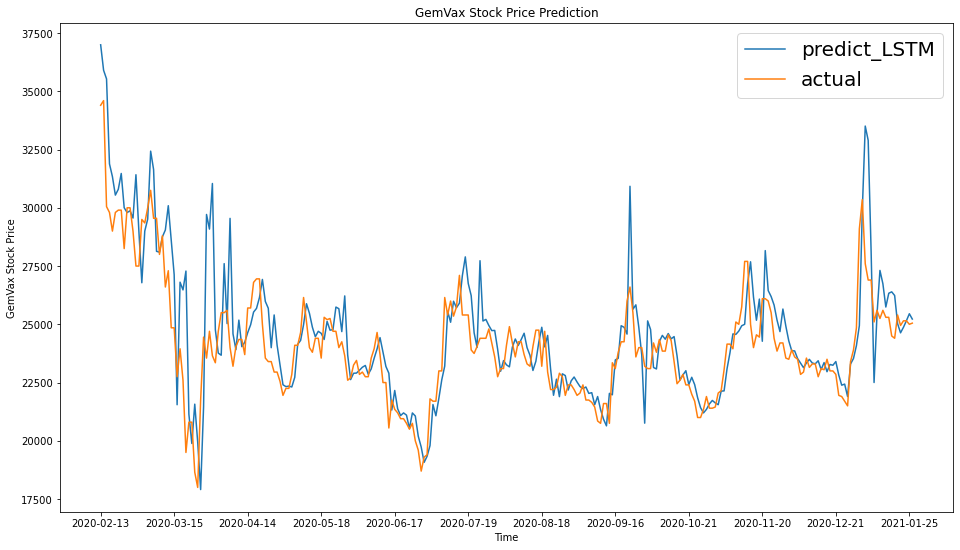

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict2, label = "predict_LSTM")
plt.plot(actual,label = "actual")
plt.xticks(np.arange(0,300,25))
plt.title('GemVax Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GemVax Stock Price')
plt.legend(prop={'size': 20})

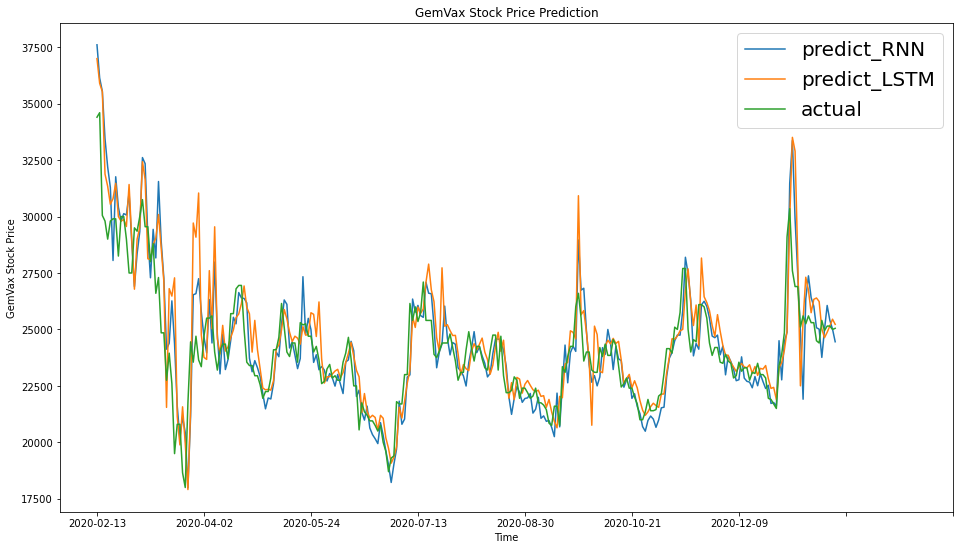

In [16]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict1, label = "predict_RNN")
plt.plot(predict2, label = "predict_LSTM")
plt.plot(actual,label = "actual")
plt.xticks(np.arange(0,324,40))
plt.title('GemVax Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GemVax Stock Price')
plt.legend(prop={'size': 20})

In [17]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = MinMaxScaler(xy[len(xy)-window:, :-1])     # 정규화
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)
recent_data = tf.expand_dims(recent_data,0)     # 3차원으로 늘려줌
print("recent_data.shape:", recent_data.shape)
# 내일 종가를 예측해본다
tomorrow = model2.predict(recent_data)

print("Tomorrow_predict", tomorrow)
tomorrow = back_MinMax(xy[len(xy)-window:, [-1]],tomorrow) # 금액데이터 역정규화한다
print("Tomorrow's stock price", tomorrow) # 예측한 주가를 출력한다

recent_data.shape: (7, 3)
recent_data: [[0.         0.         0.        ]
 [0.17391304 0.60714286 0.43589744]
 [1.         1.         0.82051282]
 [0.26086957 0.32142857 0.51282051]
 [0.73913043 0.28571429 1.        ]
 [0.91304348 0.57142857 0.74358974]
 [0.52173913 0.5        0.64102564]]
recent_data.shape: (1, 7, 3)
Tomorrow_predict [[0.6361947]]
Tomorrow's stock price [[25036.19470596]]


In [18]:
for i in range(0,10):
    xdata = []
    xdata.append(MinMaxScaler(xy[len(xy)-7:,:-1]))    # 정규화
    print('------------------------')
    print(np.array(xdata).shape)
    xdata = np.array(xdata)
    #xdata = tf.expand_dims(xdata,0)
    ydata = model2.predict(xdata)     # 예측한 값 ydata에 넣어주기
    ydata = back_MinMax(xy[len(xy)-7:, [-1]],ydata)      # 금액데이터 역정규화
    print('예측한 새로운 값 : ',ydata[0][0])
    print(xy)
    xy = np.append(xy,np.array([[ydata[0][0],ydata[0][0],ydata[0][0],ydata[0][0]]], dtype = np.int32),axis = 0)    # xy 원래 파일에 새로 예측한 달러값 더해주기 
    print(xy)

------------------------
(1, 7, 3)
예측한 새로운 값 :  25036.194705963135
[[22650 23800 22350 22850]
 [22400 22900 22150 22300]
 [22500 23350 22350 23000]
 ...
 [25150 25150 25150 25150]
 [25350 25550 24650 25000]
 [24900 25450 24450 25050]]
[[22650 23800 22350 22850]
 [22400 22900 22150 22300]
 [22500 23350 22350 23000]
 ...
 [25350 25550 24650 25000]
 [24900 25450 24450 25050]
 [25036 25036 25036 25036]]
------------------------
(1, 7, 3)
예측한 새로운 값 :  25027.299211919308
[[22650 23800 22350 22850]
 [22400 22900 22150 22300]
 [22500 23350 22350 23000]
 ...
 [25350 25550 24650 25000]
 [24900 25450 24450 25050]
 [25036 25036 25036 25036]]
[[22650 23800 22350 22850]
 [22400 22900 22150 22300]
 [22500 23350 22350 23000]
 ...
 [24900 25450 24450 25050]
 [25036 25036 25036 25036]
 [25027 25027 25027 25027]]
------------------------
(1, 7, 3)
예측한 새로운 값 :  24985.553830862045
[[22650 23800 22350 22850]
 [22400 22900 22150 22300]
 [22500 23350 22350 23000]
 ...
 [24900 25450 24450 25050]
 [25036 25036 

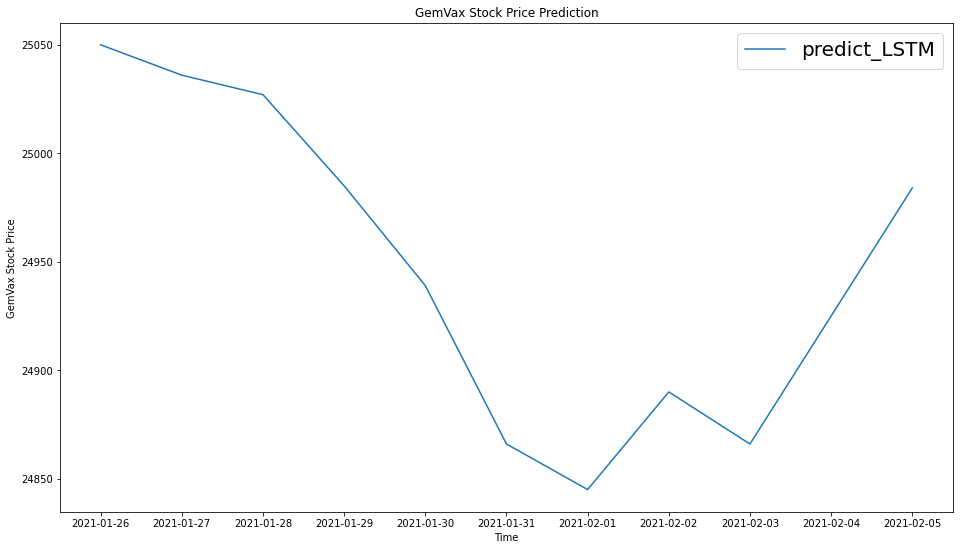

In [19]:
date = pd.DataFrame({'Date':['2021-01-26',
                             '2021-01-27',
                            '2021-01-28',
                            '2021-01-29',
                            '2021-01-30',
                            '2021-01-31',
                            '2021-02-01',
                            '2021-02-02',
                            '2021-02-03',
                            '2021-02-04',
                            '2021-02-05']})
plt.figure(figsize=(16, 9))
plt.plot(date.loc[:,'Date'],xy[len(xy)-11:, [-1]], label = "predict_LSTM")
plt.title('GemVax Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GemVax Stock Price')
plt.legend(prop={'size': 20})

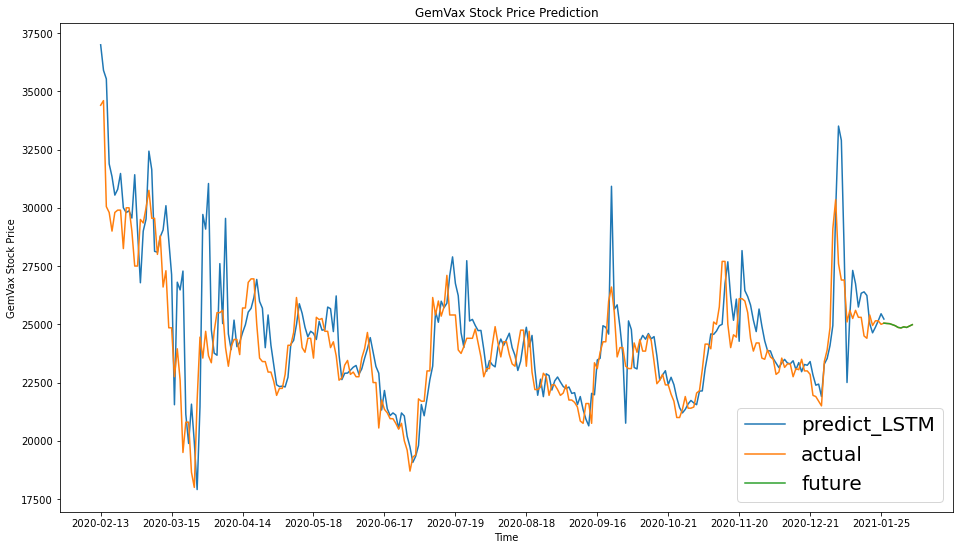

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict2, label = "predict_LSTM")
plt.plot(xy[trainSize:, [-1]],label = "actual")
plt.plot(date.loc[:,'Date'],xy[len(xy)-11:, [-1]], label = "future")

#matplotlib에서 그림을 그릴 때, tick을 몇 개나, 또 어떤 label로 표현할지를 조절하고 싶을때 plt.xticks()를 사용
plt.xticks(np.arange(0,300,25))
plt.title('GemVax Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GemVax Stock Price')
plt.legend(prop={'size': 20})